In [1]:
%pylab inline
import numpy as np

import numpy as np
import sys
import pyximport; 
pyximport.install()
import cychirpz
import pychirpz


N = 256
M = 256
start_idx = 0
np.random.seed(0)


x = np.random.normal(0, 1, (N, N))


x_fft = np.fft.fft2(x).T

w_delta = 2.0*np.pi/N

start = start_idx * w_delta
py_x_chirpz = pychirpz.zoom_fft2(x, start, w_delta, M)

x_chirpz = cychirpz.zoom_fft2(x.T.copy(), start, w_delta, M)

print x_chirpz.shape

x_fft = np.roll(x_fft, -start_idx, axis=0)
x_fft = np.roll(x_fft, -start_idx, axis=1)

#np.testing.assert_allclose(x_fft[:M, :M],
#                       x_chirpz[:M, :M], verbose=True)


            

Populating the interactive namespace from numpy and matplotlib
(256, 256)


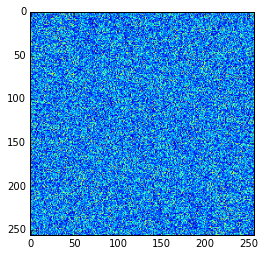

In [2]:
pylab.imshow(np.abs(x_chirpz[:M, :M]))

(0, 100)

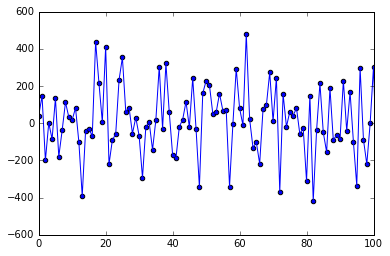

In [3]:
pylab.plot(np.real(x_chirpz[90]))
pylab.scatter(np.arange(256), np.real(py_x_chirpz[90]))
pylab.xlim(0, 100)